In [1]:
%matplotlib inline

import torch
from matplotlib import pyplot as plt

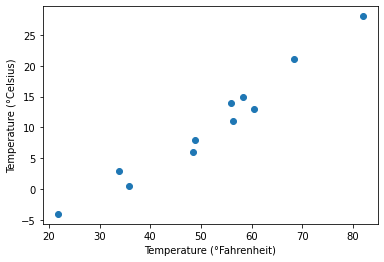

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
# Mean square loss.
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [7]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [8]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [9]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [10]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):   
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b) # Forward pass
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # Backward pass

        params -= learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000,100000,500000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            print('    Params:', params)
            print('    Grad:  ', grad)
    return params

In [12]:
params= training_loop(n_epochs = 500000, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4667,  16.5122])
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])
Epoch 4000, Loss 25.691162
    Params: tensor([ 0.2528, -1.1832])
    Grad:   tensor([-0.0496,  2.8231])
Epoch 5000, Loss 24.907745
    Params: tensor([ 0.2577, -1.4631])
    Grad:   tensor([-0.0488,  2.7741])
Epoch 100000, Loss 3.716725
    Params: tensor([  0.4839, -14.

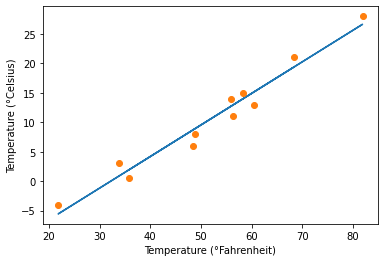

In [13]:
t_p = model(t_u, *params)

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## Using autograde

In [17]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
params.grad is None


True

In [18]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [19]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [23]:
training_loop(n_epochs = 20000,learning_rate = 1e-4,params = torch.tensor([1.0, 0.0], requires_grad=True),t_u = t_u,t_c= t_c)

Epoch 500, Loss 28.659660
Epoch 1000, Loss 28.212988
Epoch 1500, Loss 27.774073
Epoch 2000, Loss 27.342773
Epoch 2500, Loss 26.918964
Epoch 3000, Loss 26.502516
Epoch 3500, Loss 26.093292
Epoch 4000, Loss 25.691162
Epoch 4500, Loss 25.296026
Epoch 5000, Loss 24.907745
Epoch 5500, Loss 24.526201
Epoch 6000, Loss 24.151283
Epoch 6500, Loss 23.782873
Epoch 7000, Loss 23.420851
Epoch 7500, Loss 23.065123
Epoch 8000, Loss 22.715569
Epoch 8500, Loss 22.372076
Epoch 9000, Loss 22.034554
Epoch 9500, Loss 21.702887
Epoch 10000, Loss 21.376980
Epoch 10500, Loss 21.056721
Epoch 11000, Loss 20.742027
Epoch 11500, Loss 20.432796
Epoch 12000, Loss 20.128937
Epoch 12500, Loss 19.830345
Epoch 13000, Loss 19.536940
Epoch 13500, Loss 19.248629
Epoch 14000, Loss 18.965319
Epoch 14500, Loss 18.686930
Epoch 15000, Loss 18.413374
Epoch 15500, Loss 18.144575
Epoch 16000, Loss 17.880428
Epoch 16500, Loss 17.620869
Epoch 17000, Loss 17.365807
Epoch 17500, Loss 17.115185
Epoch 18000, Loss 16.868914
Epoch 18500,

tensor([ 0.3222, -5.1225], requires_grad=True)

#### Optimizers

In [24]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [25]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [26]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [27]:
def training_loop(n_epochs, optimizer, params,t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p,t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [28]:
params = torch.tensor([1.,0.], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params],lr=learning_rate)

training_loop(
    n_epochs = 20000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c )

Epoch 500, Loss 28.659660
Epoch 1000, Loss 28.212988
Epoch 1500, Loss 27.774073
Epoch 2000, Loss 27.342775
Epoch 2500, Loss 26.918968
Epoch 3000, Loss 26.502516
Epoch 3500, Loss 26.093292
Epoch 4000, Loss 25.691162
Epoch 4500, Loss 25.296026
Epoch 5000, Loss 24.907745
Epoch 5500, Loss 24.526201
Epoch 6000, Loss 24.151283
Epoch 6500, Loss 23.782873
Epoch 7000, Loss 23.420851
Epoch 7500, Loss 23.065125
Epoch 8000, Loss 22.715570
Epoch 8500, Loss 22.372078
Epoch 9000, Loss 22.034557
Epoch 9500, Loss 21.702887
Epoch 10000, Loss 21.376980
Epoch 10500, Loss 21.056721
Epoch 11000, Loss 20.742027
Epoch 11500, Loss 20.432796
Epoch 12000, Loss 20.128937
Epoch 12500, Loss 19.830345
Epoch 13000, Loss 19.536940
Epoch 13500, Loss 19.248629
Epoch 14000, Loss 18.965319
Epoch 14500, Loss 18.686930
Epoch 15000, Loss 18.413374
Epoch 15500, Loss 18.144575
Epoch 16000, Loss 17.880428
Epoch 16500, Loss 17.620869
Epoch 17000, Loss 17.365807
Epoch 17500, Loss 17.115185
Epoch 18000, Loss 16.868914
Epoch 18500,

tensor([ 0.3222, -5.1225], requires_grad=True)

#### Training, validation, and overfitting

In [32]:
n_samples = t_u.shape[0]
n_val = int(.2*n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 5,  2,  3,  7, 10,  6,  4,  8,  0]), tensor([9, 1]))

In [33]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Sort of normalizing
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [36]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): #Context manager in order not to track the computation graph
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params

In [38]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 84.9820, Validation loss 59.5848
Epoch 2, Training loss 44.4540, Validation loss 11.1909
Epoch 3, Training loss 37.4037, Validation loss 2.8271
Epoch 500, Training loss 7.1164, Validation loss 2.2533
Epoch 1000, Training loss 3.4131, Validation loss 2.8678
Epoch 1500, Training loss 2.9447, Validation loss 3.1088
Epoch 2000, Training loss 2.8854, Validation loss 3.1973
Epoch 2500, Training loss 2.8779, Validation loss 3.2292
Epoch 3000, Training loss 2.8769, Validation loss 3.2405


tensor([  5.4128, -17.4376], requires_grad=True)

In [39]:
# To differentiate between training and inference
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

# Exercice

In [44]:
def model2(t_u, w1 ,w2 , b):
    return w2 * t_u ** 2 + w1 * t_u + b ;

In [63]:
def training_loop2(n_epochs, optimizer, params, train_t_u,train_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model2(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}")
    return params

In [75]:
params = torch.tensor([1.0, 1.0,0.0], requires_grad=True)
learning_rate = 1e-3
optimizer2 = optim.Adam ([params], lr=learning_rate)
training_loop2(
    n_epochs = 10000,
    optimizer = optimizer2,
    params = params,
    train_t_u = t_u,
    train_t_c = t_c)

Epoch 1, Training loss 11709471.0000
Epoch 2, Training loss 11685968.0000
Epoch 3, Training loss 11662487.0000
Epoch 500, Training loss 3668164.2500
Epoch 1000, Training loss 768787.1875
Epoch 1500, Training loss 90021.2500
Epoch 2000, Training loss 4791.3481
Epoch 2500, Training loss 98.0145
Epoch 3000, Training loss 6.6097
Epoch 3500, Training loss 6.1173
Epoch 4000, Training loss 6.0967
Epoch 4500, Training loss 6.0711
Epoch 5000, Training loss 6.0384
Epoch 5500, Training loss 5.9969
Epoch 6000, Training loss 5.9446
Epoch 6500, Training loss 5.8790
Epoch 7000, Training loss 5.7971
Epoch 7500, Training loss 5.6960
Epoch 8000, Training loss 5.5724
Epoch 8500, Training loss 5.4236
Epoch 9000, Training loss 5.2475
Epoch 9500, Training loss 5.0440
Epoch 10000, Training loss 4.8158


tensor([-0.0307,  0.0047, -1.0978], requires_grad=True)

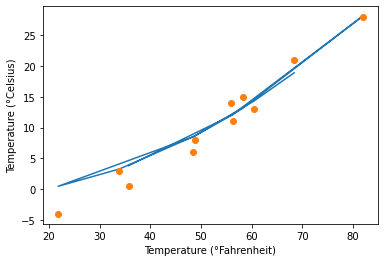

In [76]:
t_p = model2(t_u, *params)

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')